In [1]:
%matplotlib inline

import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
application_train_p = os.path.join('data', 'application_train.csv')

In [3]:
application_train = pd.read_csv(application_train_p)

In [4]:
with open('labels_util.txt') as f:
    labels = [str(l).strip() for l in f]

In [5]:
application_train = application_train[labels].dropna()

In [6]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70695 entries, 2 to 307498
Data columns (total 30 columns):
SK_ID_CURR                     70695 non-null int64
TARGET                         70695 non-null int64
NAME_CONTRACT_TYPE             70695 non-null object
CODE_GENDER                    70695 non-null object
FLAG_OWN_REALTY                70695 non-null object
CNT_CHILDREN                   70695 non-null int64
AMT_INCOME_TOTAL               70695 non-null float64
AMT_CREDIT                     70695 non-null float64
AMT_ANNUITY                    70695 non-null float64
AMT_GOODS_PRICE                70695 non-null float64
NAME_TYPE_SUITE                70695 non-null object
NAME_INCOME_TYPE               70695 non-null object
NAME_EDUCATION_TYPE            70695 non-null object
NAME_FAMILY_STATUS             70695 non-null object
NAME_HOUSING_TYPE              70695 non-null object
REGION_POPULATION_RELATIVE     70695 non-null float64
DAYS_BIRTH                     70695 non

In [7]:
for label in labels[1:]:
    print(application_train.groupby(label)['SK_ID_CURR'].count())
    print()

TARGET
0    65542
1     5153
Name: SK_ID_CURR, dtype: int64

NAME_CONTRACT_TYPE
Cash loans         63602
Revolving loans     7093
Name: SK_ID_CURR, dtype: int64

CODE_GENDER
F    28853
M    41842
Name: SK_ID_CURR, dtype: int64

FLAG_OWN_REALTY
N    22400
Y    48295
Name: SK_ID_CURR, dtype: int64

CNT_CHILDREN
0     42008
1     18309
2      8961
3      1258
4       122
5        27
6         4
7         1
8         2
9         1
11        1
14        1
Name: SK_ID_CURR, dtype: int64

AMT_INCOME_TOTAL
27000.0        5
27900.0        1
31500.0        6
32850.0        1
33750.0        2
35550.0        1
36000.0       14
36900.0        1
38250.0        2
40500.0       14
40950.0        1
42750.0        1
44100.0        1
45000.0      124
47250.0        3
48600.0        1
49500.0       17
50850.0        1
51817.5        1
52438.5        1
53977.5        1
54000.0      151
56250.0        5
58500.0       76
59265.0        1
59850.0        1
60750.0        3
61200.0        1
61650.0        2
630

In [8]:
def normalize_column(col_name, frame):
    series = frame[col_name]
    normalized_series = (series - series.mean()) / series.std()
    normalized_series = normalized_series[abs(normalized_series) < normalized_series.std() * 1.96]
    frame[col_name] = normalized_series
    frame.dropna(inplace=True)

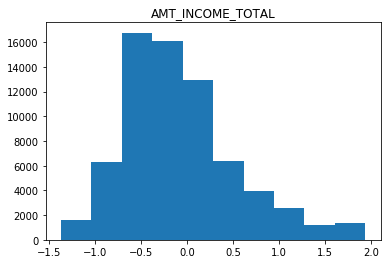

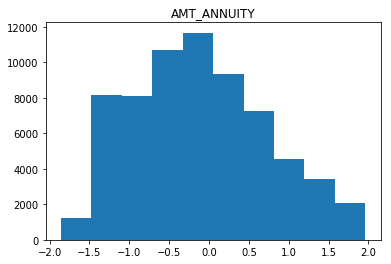

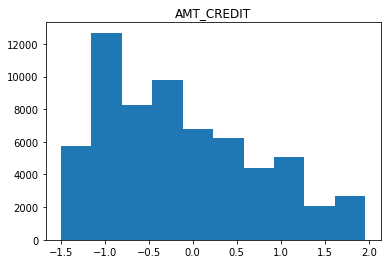

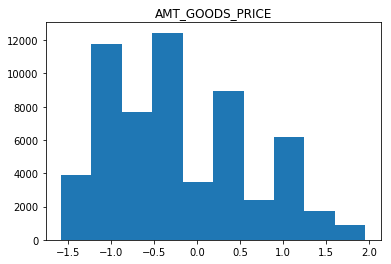

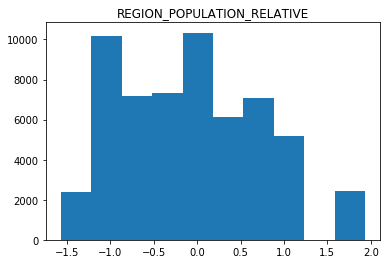

In [9]:
for label in ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE']:
    normalize_column(label, application_train)
    plt.title(label)
    plt.hist(list(application_train[label]), bins=10)
    plt.show()

In [10]:
application_train['AMT_INCOME_TOTAL'] = pd.cut(application_train['AMT_INCOME_TOTAL'], 10, labels=list(range(10)))
application_train['AMT_ANNUITY'] = pd.cut(application_train['AMT_ANNUITY'], 10, labels=list(range(10)))
application_train['AMT_CREDIT'] = pd.cut(application_train['AMT_ANNUITY'], 10, labels=list(range(10)))
application_train['AMT_GOODS_PRICE'] = pd.cut(application_train['AMT_GOODS_PRICE'], 10, labels=list(range(10)))
application_train['REGION_POPULATION_RELATIVE'] = pd.cut(application_train['REGION_POPULATION_RELATIVE'], 10, labels=list(range(10)))

In [11]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,0,0,0,0,0,...,1.0,2,2,Government,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,N,1,4,4,4,6,...,3.0,2,2,Self-employed,0.0,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,0,3,3,3,1,...,1.0,3,3,Business Entity Type 2,0.0,0.0,0.0,0.0,0.0,1.0
21,100025,0,Cash loans,F,Y,1,4,6,6,8,...,3.0,2,2,Trade: type 7,0.0,0.0,0.0,0.0,1.0,4.0
24,100029,0,Cash loans,M,N,2,2,1,1,1,...,4.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
application_train.groupby('CNT_CHILDREN')['SK_ID_CURR'].count()

CNT_CHILDREN
0     34215
1     15335
2      7493
3      1039
4       102
5        24
6         4
8         2
9         1
11        1
14        1
Name: SK_ID_CURR, dtype: int64

In [13]:
bins = [-1, 0, 1, 2, 3, 20]
labels = ['zero', 'one', 'two', 'three', 'three+']

application_train['CNT_CHILDREN'] = pd.cut(application_train['CNT_CHILDREN'], bins, labels=labels)

In [14]:
application_train.groupby('CNT_CHILDREN')['SK_ID_CURR'].count()

CNT_CHILDREN
zero      34215
one       15335
two        7493
three      1039
three+      135
Name: SK_ID_CURR, dtype: int64

In [15]:
application_train.groupby('CNT_FAM_MEMBERS')['SK_ID_CURR'].count()

CNT_FAM_MEMBERS
1.0      8053
2.0     28091
3.0     13834
4.0      7107
5.0      1000
6.0        99
7.0        24
8.0         4
10.0        2
11.0        1
13.0        1
15.0        1
Name: SK_ID_CURR, dtype: int64

In [16]:
bins = [0, 1, 2, 3, 4, 20]
labels = ['one', 'two', 'three', 'four', 'four+']

application_train['CNT_FAM_MEMBERS'] = pd.cut(application_train['CNT_FAM_MEMBERS'], bins, labels=labels)

application_train.groupby('CNT_FAM_MEMBERS')['SK_ID_CURR'].count()

CNT_FAM_MEMBERS
one       8053
two      28091
three    13834
four      7107
four+     1132
Name: SK_ID_CURR, dtype: int64

In [17]:
application_train['YEARS_BIRTH'] = (-application_train['DAYS_BIRTH'] / 365).astype(int)
del application_train['DAYS_BIRTH']
application_train['YEARS_EMPLOYED'] = (-application_train['DAYS_EMPLOYED'] / 365).astype(int)
del application_train['DAYS_EMPLOYED']
application_train['OWN_CAR_AGE'] = (-application_train['OWN_CAR_AGE'] / 30).astype(int)
del application_train['OWN_CAR_AGE']

In [18]:
application_train.groupby('YEARS_BIRTH')['SK_ID_CURR'].count()

YEARS_BIRTH
20       1
21     166
22     509
23     815
24     845
25     934
26    1081
27    2049
28    1980
29    2000
30    2047
31    2208
32    2090
33    2002
34    1957
35    2048
36    2097
37    2201
38    2243
39    2172
40    2080
41    2087
42    1922
43    1949
44    1802
45    1502
46    1573
47    1377
48    1440
49    1297
50    1215
51    1194
52    1124
53    1191
54    1116
55     774
56     650
57     597
58     470
59     490
60     253
61     178
62     149
63     135
64     111
65      36
66      26
67      25
68       9
Name: SK_ID_CURR, dtype: int64

In [19]:
bins = [19, 21, 22, 25, 30, 35, 45, 55, 60, 80]
labels = ['20', '22', '25', '30', '35', '45', '55', '60', '60+']

application_train['YEARS_BIRTH'] = pd.cut(application_train['YEARS_BIRTH'], bins, labels=labels)

application_train.groupby('YEARS_BIRTH')['SK_ID_CURR'].count()

YEARS_BIRTH
20       167
22       509
25      2594
30      9157
35     10305
45     20055
55     12301
60      2460
60+      669
Name: SK_ID_CURR, dtype: int64

In [20]:
application_train.groupby('YEARS_EMPLOYED')['SK_ID_CURR'].count()

YEARS_EMPLOYED
0     6278
1     7174
2     7001
3     5987
4     5283
5     3859
6     3664
7     3245
8     2712
9     2106
10    1753
11    1339
12    1206
13     951
14    1023
15     585
16     509
17     442
18     411
19     410
20     337
21     316
22     261
23     194
24     182
25     151
26     104
27     121
28     109
29      94
30      66
31      63
32      53
33      44
34      53
35      29
36      36
37      22
38      11
39      15
40       4
41       4
42       2
43       4
44       2
48       1
49       1
Name: SK_ID_CURR, dtype: int64

In [21]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 60]
labels = ['1', '2', '3', '4', '5','6','7', '8', '9', '10', '15', '20', '20+']

application_train['YEARS_EMPLOYED'] = pd.cut(application_train['YEARS_EMPLOYED'], bins, labels=labels)

application_train.groupby('YEARS_EMPLOYED')['SK_ID_CURR'].count()

YEARS_EMPLOYED
1      7174
2      7001
3      5987
4      5283
5      3859
6      3664
7      3245
8      2712
9      2106
10     1753
15     5104
20     2109
20+    1942
Name: SK_ID_CURR, dtype: int64

In [22]:
application_train['AMT_REQ_CREDIT_BUREAU_SUM'] = application_train[['AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

del application_train['AMT_REQ_CREDIT_BUREAU_HOUR']
del application_train['AMT_REQ_CREDIT_BUREAU_DAY']
del application_train['AMT_REQ_CREDIT_BUREAU_WEEK']
del application_train['AMT_REQ_CREDIT_BUREAU_MON']
del application_train['AMT_REQ_CREDIT_BUREAU_QRT']
del application_train['AMT_REQ_CREDIT_BUREAU_YEAR']

In [23]:
application_train.groupby('AMT_REQ_CREDIT_BUREAU_SUM')['SK_ID_CURR'].count()

AMT_REQ_CREDIT_BUREAU_SUM
0.0     10729
1.0     12221
2.0     11794
3.0      8877
4.0      5999
5.0      3576
6.0      2178
7.0      1182
8.0       770
9.0       442
10.0      188
11.0      100
12.0       56
13.0       34
14.0       21
15.0       14
16.0       13
17.0        6
18.0        6
19.0        4
20.0        2
22.0        2
23.0        2
28.0        1
Name: SK_ID_CURR, dtype: int64

In [24]:
bins = [-1, 0, 1, 2, 3, 4, 5, 10, 30]
labels = ['0', '1', '2', '3', '4', '5', '10', '10+']

application_train['AMT_REQ_CREDIT_BUREAU_SUM'] = pd.cut(application_train['AMT_REQ_CREDIT_BUREAU_SUM'], bins, labels=labels)

application_train.groupby('AMT_REQ_CREDIT_BUREAU_SUM')['SK_ID_CURR'].count()

AMT_REQ_CREDIT_BUREAU_SUM
0      10729
1      12221
2      11794
3       8877
4       5999
5       3576
10      4760
10+      261
Name: SK_ID_CURR, dtype: int64

In [25]:
application_train.dropna(inplace=True)

In [26]:
application_train.shape

(51939, 24)

In [27]:
for col in application_train.columns:
    application_train[col] = application_train[col].astype('category')

In [28]:
categorical = pd.get_dummies(application_train.loc[:, 
    application_train.columns != 'SK_ID_CURR'
])

del categorical['TARGET_0']
del categorical['TARGET_1']

categorical['TARGET'] = application_train['TARGET'].astype('uint8')

In [29]:
print(categorical.shape)
categorical.head()

(51939, 206)


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN_zero,CNT_CHILDREN_one,CNT_CHILDREN_two,CNT_CHILDREN_three,...,YEARS_EMPLOYED_20+,AMT_REQ_CREDIT_BUREAU_SUM_0,AMT_REQ_CREDIT_BUREAU_SUM_1,AMT_REQ_CREDIT_BUREAU_SUM_2,AMT_REQ_CREDIT_BUREAU_SUM_3,AMT_REQ_CREDIT_BUREAU_SUM_4,AMT_REQ_CREDIT_BUREAU_SUM_5,AMT_REQ_CREDIT_BUREAU_SUM_10,AMT_REQ_CREDIT_BUREAU_SUM_10+,TARGET
13,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
15,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24,1,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
33,1,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
categorical.to_csv(os.path.join('data', 'application_train_preprocessed.csv'), index=False)

In [31]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51939 entries, 13 to 307497
Columns: 206 entries, NAME_CONTRACT_TYPE_Cash loans to TARGET
dtypes: uint8(206)
memory usage: 10.6 MB


In [32]:
list(categorical.columns)

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'CNT_CHILDREN_zero',
 'CNT_CHILDREN_one',
 'CNT_CHILDREN_two',
 'CNT_CHILDREN_three',
 'CNT_CHILDREN_three+',
 'AMT_INCOME_TOTAL_0',
 'AMT_INCOME_TOTAL_1',
 'AMT_INCOME_TOTAL_2',
 'AMT_INCOME_TOTAL_3',
 'AMT_INCOME_TOTAL_4',
 'AMT_INCOME_TOTAL_5',
 'AMT_INCOME_TOTAL_6',
 'AMT_INCOME_TOTAL_7',
 'AMT_INCOME_TOTAL_8',
 'AMT_INCOME_TOTAL_9',
 'AMT_CREDIT_0',
 'AMT_CREDIT_1',
 'AMT_CREDIT_2',
 'AMT_CREDIT_3',
 'AMT_CREDIT_4',
 'AMT_CREDIT_5',
 'AMT_CREDIT_6',
 'AMT_CREDIT_7',
 'AMT_CREDIT_8',
 'AMT_CREDIT_9',
 'AMT_ANNUITY_0',
 'AMT_ANNUITY_1',
 'AMT_ANNUITY_2',
 'AMT_ANNUITY_3',
 'AMT_ANNUITY_4',
 'AMT_ANNUITY_5',
 'AMT_ANNUITY_6',
 'AMT_ANNUITY_7',
 'AMT_ANNUITY_8',
 'AMT_ANNUITY_9',
 'AMT_GOODS_PRICE_0',
 'AMT_GOODS_PRICE_1',
 'AMT_GOODS_PRICE_2',
 'AMT_GOODS_PRICE_3',
 'AMT_GOODS_PRICE_4',
 'AMT_GOODS_PRICE_5',
 'AMT_GOODS_PRICE_6',
 '